In [1]:
import commons


# this is a list of features which are used in the Project Activity Score
features = [
    'Number of contributors in the last three months',
    'Number of commits in the last three months'
]

class TestVector(commons.BaseTestVector):
        
    def __init__(self, alias = ''):
        super().__init__(features, alias)
            
    def number_of_contributors(self, n):
        return self.set('Number of contributors in the last three months', n)
    
    def number_of_commits(self, n):
        return self.set('Number of commits in the last three months', n)


test_vector_list = commons.TestVectorList(features)

In [2]:
all_unknown_values = TestVector().score_from(0.0).score_to(0.1)
test_vector_list.register(all_unknown_values)

test_vector_list.register(
    TestVector()
        .number_of_contributors(0)
        .number_of_commits(0)
        .score_from(0.0)
        .score_to(0.5)
)

test_vector_list.register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(5)
        .score_from(0.0)
        .score_to(2.0) # used to be 3.0
)

test_vector_list.register(
    TestVector()
        .number_of_contributors(3)
        .number_of_commits(50)
        .score_from(1.5)
        .score_to(3.0) # used to be 5.5
)

test_vector_list.register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(20)
        .score_from(0.0)
        .score_to(2.0) # used to be 3.5
)

# it's not too good if a single person maintains a project
test_vector_list.register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(200)
        .score_from(3.0)
        .score_to(5.0) # used to be 9.0
)

test_vector_list.register(
    TestVector()
        .number_of_contributors(1)
        .number_of_commits(500)
        .score_from(5.0)
        .score_to(6.5) # used to be 9.0
)

# it's good if there are many contributors even if there are not too many commits
test_vector_list.register(
    TestVector()
        .number_of_contributors(20)
        .number_of_commits(50)
        .score_from(5.0)
        .score_to(6.5)
)

# if there are many contributors and commits, the score should be close to max
test_vector_list.register(
    TestVector()
        .number_of_contributors(20)
        .number_of_commits(200)
        .score_from(7.0)
        .score_to(9.0)
)
test_vector_list.register(
    TestVector()
        .number_of_contributors(30)
        .number_of_commits(400)
        .score_from(8.0)
        .score_to(10.0)
)

registered: test_vector_0
registered: test_vector_1
registered: test_vector_2
registered: test_vector_3
registered: test_vector_4
registered: test_vector_5
registered: test_vector_6
registered: test_vector_7
registered: test_vector_8
registered: test_vector_9


In [3]:
test_vector_list.check()

In [4]:
# define test vectors
test_vectors = test_vector_list.make_data_frame()

# store the test vectors to a CSV file
filename = '../../../resources/com/sap/sgs/phosphor/fosstars/model/score/oss/ProjectActivityScoreTestVectors.csv'
test_vectors.to_csv(filename)

# print out the test vectors
test_vectors

alias  score_from  score_to label  \
0  test_vector_0         0.0       0.1  None   
1  test_vector_1         0.0       0.5  None   
2  test_vector_2         0.0       2.0  None   
3  test_vector_3         1.5       3.0  None   
4  test_vector_4         0.0       2.0  None   
5  test_vector_5         3.0       5.0  None   
6  test_vector_6         5.0       6.5  None   
7  test_vector_7         5.0       6.5  None   
8  test_vector_8         7.0       9.0  None   
9  test_vector_9         8.0      10.0  None   

  Number of contributors in the last three months  \
0                                         unknown   
1                                               0   
2                                               1   
3                                               3   
4                                               1   
5                                               1   
6                                               1   
7                                              20   
8                                              20   
9                                              30   

  Number of commits in the last three months  
0                                    unknown  
1                                          0  
2                                          5  
3                                         50  
4                                         20  
5                                        200  
6                                        500  
7                                         50  
8                                        200  
9                                        400

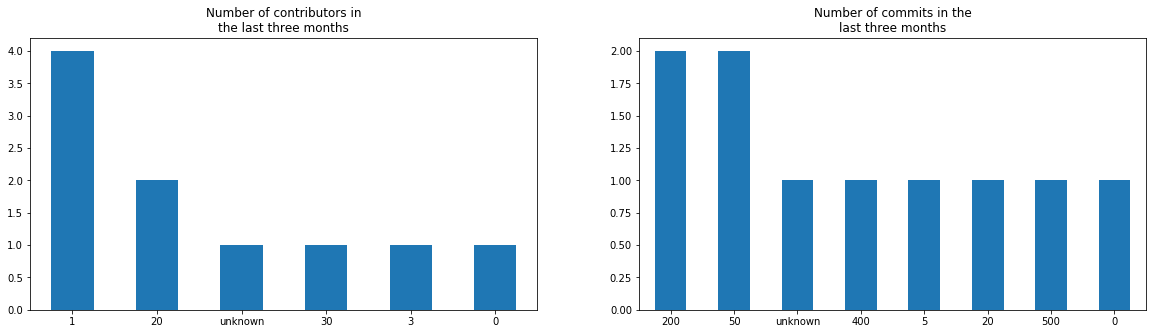

In [5]:
commons.draw_hists(features, test_vectors)